# Vaja 1 - Od kamere do preproste detekcije predmetov

Da uspešno opravite vajo, jo morate predstaviti asistentu na vajah. Pri nekaterih nalogah so vprašanja, ki zahtevajo skiciranje, ročno računanje in razmislek. Končno rešitev na takšna vprašanja vpišite v predvideni prostor, postopek reševanja pa razložite asistentu na vajah. Deli nalog, ki imajo pred navodilom navedene točke, niso obvezni. Brez njih lahko za celotno vajo dobite največ **75** točk (zgornja meja je **100** točk kar pomeni oceno 10). V nekaterih vajah je dodatnih nalog več in vam ni potrebno opraviti vseh.


In [1]:
# import os
# PROJECT_ROOT = os.path.dirname(os.getcwd())
# # Adjust cwd to project root
# os.chdir(PROJECT_ROOT)
# print(os.getcwd())

## Naloga 1: Kamera

Namen te naloge je spoznati model kamere z luknjico (<i>pin-hole camera</i>) ter osnove digitalnega zajema slike. Kot ste to izvedeli na predavanjih, model kamere z luknjico opisuje par preprostih geometrijskih razmerij:

$x = -f \frac{X}{Z} $ in $ y = -f \frac{Y}{Z}$,<br>


ki točko v prostoru s koordinatami $(X, Y, Z)$ preko goriščne razdalje $f$ poveže z njeno projekcijo na sliki $(x, y)$. Grafično je povezava prikazana še na spodnji sliki.

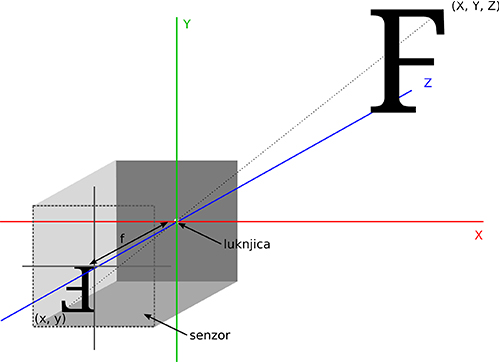

Rešite naslednje naloge:

* Kockasta škatla z velikostjo stranice $10cm$ z majhno odprtino na prednji strani deluje kot kamera z luknjico. Usmerimo jo proti drevesu, ki je od kamere oddaljeno $14m$. Kako velika je slika drevesa, ki nastane na zadnji strani škatle, če je drevo visoko $5m$? Rešitev poslikajte in dodajte sliko v Jupyter notebook <i>(Edit -> Insert Image)</i>.

![camera_tree](resources/notes/camera_tree.png)

* Z enako kamero, kot v prejšnji nalogi opazujemo avtomobil, širok $2.5m$, ki je na začetku od kamere oddaljen $10m$, nato pa se z enakomernim pospeškom $0.5\frac{m}{s^2}$ oddaljuje od kamere. S pomočjo Python skripte in knjižnice MatPlotLib narišite graf, kako se širina slike avtomobila spreminja s časom. Izračunajte vrednosti za prvih $30s$ v intervalu $10$ meritev na sekundo. Za izris grafa uporabite funkcijo <i>matplotlib.pyplot</i>.

![camera_car](resources/notes/camera_car.png)

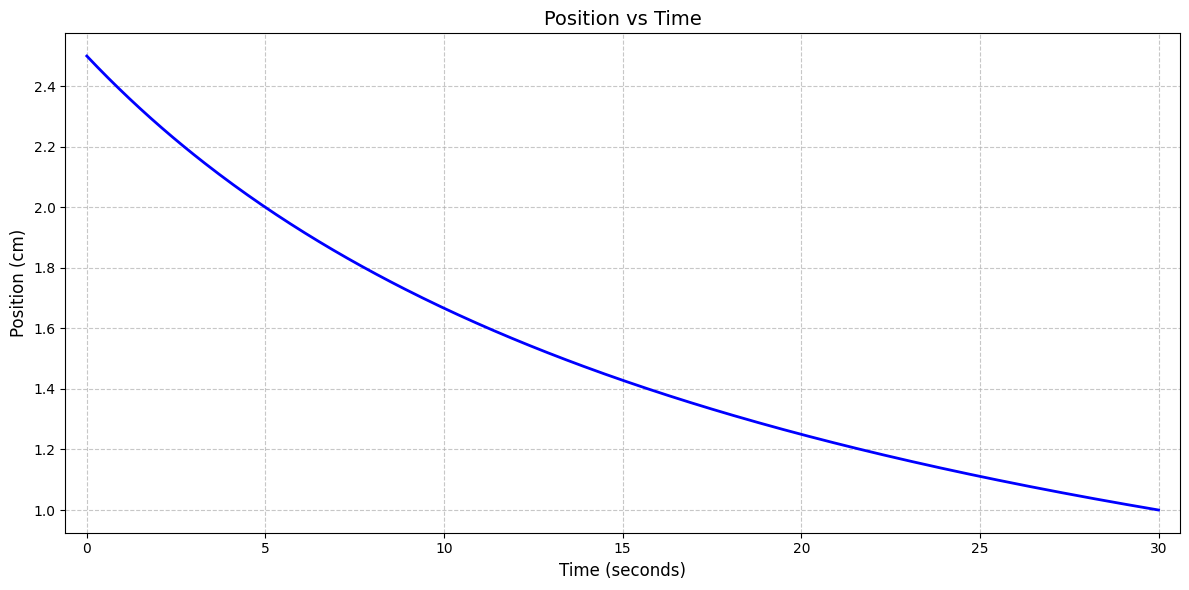

In [2]:
import matplotlib.pyplot as plt
import numpy as np

width = 2.5
a = 0.5
f = 0.1
z = 10

def get_x(z):
    return f * width / z

for i in range(301):
    i /= 10
    x = get_x(z + i * a) * 100
    #print(f"t: {i}s x: {x:.4f} cm")


def plot_time_series(z, a, get_x):
    # Create time points from 0 to 30 seconds with 0.1s intervals
    t = np.linspace(0, 30, 301)
    
    # Calculate x values
    x = [get_x(z + t_i * a) * 100 for t_i in t]
    
    # Create the figure and axis
    plt.figure(figsize=(12, 6))
    
    # Plot the data
    plt.plot(t, x, 'b-', linewidth=2)
    
    # Add labels and title
    plt.xlabel('Time (seconds)', fontsize=12)
    plt.ylabel('Position (cm)', fontsize=12)
    plt.title('Position vs Time', fontsize=14)
    
    # Add grid
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Customize ticks
    plt.xticks(np.arange(0, 31, 5))
    
    # Add margins for better visibility
    plt.margins(x=0.02)
    
    # Adjust layout
    plt.tight_layout()
    
    # Show plot
    plt.show()


plot_time_series(z, a, get_x)

* Zakaj se kamere z luknjico uporabljajo bolj kot teoretičen model in ne tudi v praksi? Naštejte prednosti in slabosti kamer z lečami.

V praksi moramo za kvalitetno sliko zajeti cim vec svetlobe (fotonov, ki padejo na senzor). To je pri kameri z luknjico nemogoce, saj je odprtina zelo majhna. 
Zato v praksu uporabljamo lece, ki na vecji povrsini zbirajo svetlobne zarke in jih usmerijo v 1 tocko (kot kamera z luknjico).
- Predsnoti: zajamemo vec svetlobe, izbira razlicnih tipov lec (wide-angle, telephoto, fish-eye...) za razlicne effekte koncne slike. 
- Slabosti: draga izdelava (kamera in leca), kvaliteta lece je lahko slaba

Sliko, ki je projicirana na zadnjo stran kamere, zajamemo v digitalno obliko z (največkrat) matričnim senzorjem. Več o tem ste povedali že na predavanih, tu pa ponovimo samo, da sta najpomembnejša parametra senzorja njegova velikost in gostota. Ker se gostota senzorja največkrat podaja v točkah na palec (<i>dots per inch -- DPI</i>), si je na tem mestu pametno zapomniti, da je $1~\mathrm{inch} = 2.54 cm$.

* S kamero z goriščno razdaljo $f = 60mm$ posnamemo sliko vertikalnega valja, ki je od kamere oddaljen $95m$. Določi višino valja, če v digitalizirani obliki slika valja po višini zavzame $200$ slikovnih elementov. Ločljivost tipala je $2500$ DPI.

![camera_cylinder](resources/notes/camera_cylinder.png)

* <b>$\star$ (10 točk)</b> Za naslednjo nalogo boste potrebovali spletno kamero ter knjižnico OpenCV. Spletna kamera sicer ni čista kamera z luknjico, vsebuje lečo, zato pri zajemu slike prihaja do določene stopnje popačenja. Kljub temu z uporabo kamere preizkusite zakonitosti, ki jih opisuje enačba kamere z luknjico v praksi. Kamero postavite na statično mesto s pogledom na mizo. Pred kamero na izmerjeno razdaljo od nje postavite objekt. S programom za zajem slik iz kamere pridobite več (vsaj šest) zaporednih slik objekta pri čemer objekt premikajte na različne razdalje in zabeležite oddaljenost od kamere. Nato posamezne slike naložite v Jupyter notebook in zabeležite višino objekta v številu slikovnih elementov (pomagajte si z orodjem <i>PyPlot</i>, lahko pa to naredite tudi v programu za urejanje slik). Na podlagi višine v slikovnih elementih in oddaljenosti od kamere lahko določite kakšna bo velikost v slikovnih elementih pri drugi razdalji od kamere. Preverite oceno še z dejansko meritvijo in ocenite napake.

In [3]:
from os import path
import numpy as np
import cv2


cap = cv2.VideoCapture(0)  # 0 = default webcam
frame_count = 0  # Initialize counter for saved frames

while(False):
   # Try to get current frame from webcam
   ret, frame = cap.read()
   
   # If not possible (camera disconnected, etc.), end execution
   if ret == False:
       break
       
   # Show current frame
   cv2.imshow('frame', frame)
   
   # Check for key press
   key = cv2.waitKey(1) & 0xFF
   
   # If 'q' is pressed, break the loop
   if key == ord('q'):
       break
   # If 's' is pressed, save the frame
   elif key == ord('s'):
       # Save frame as JPG with counter and timestamp
       filename = f'frame_{frame_count:03d}.jpg'
       dir = "resources/vaja1/n1"
       print(path.join(dir, filename))
       cv2.imwrite(path.join(dir, filename), frame)
       print(f'Saved frame as {filename}')
       frame_count += 1  # Increment counter

# Release camera and close window
cap.release()
cv2.destroyAllWindows()

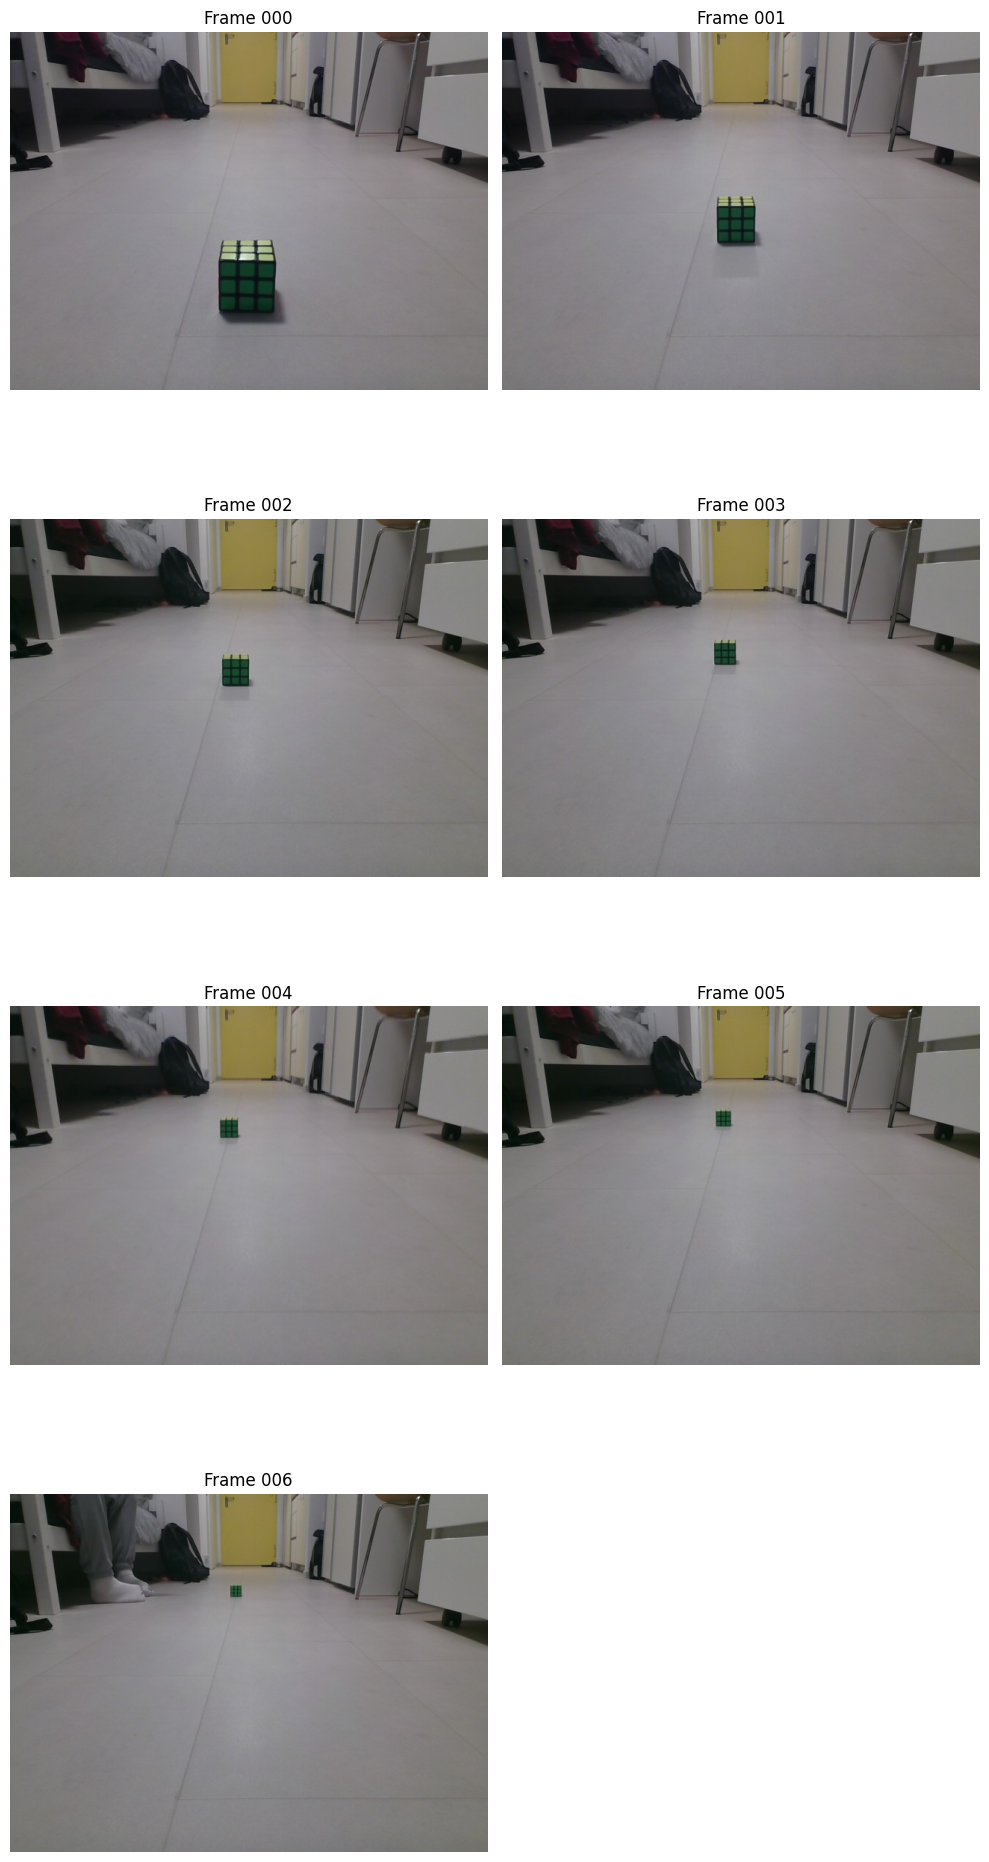

In [4]:
import matplotlib.pyplot as plt
import os

# Path to your images
folder_path = "resources/n1"

# Get list of image files
image_files = os.listdir(folder_path)

# Create figure
plt.figure(figsize=(10, 20))  # Adjusted for 4 rows

# Load and display each image
for i, img_name in enumerate(image_files):
    # Create full path
    full_path = os.path.join(folder_path, img_name)
    
    # Read image using cv2
    img = cv2.imread(full_path)
    
    # Convert BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Create subplot
    plt.subplot(4, 2, i+1)
    plt.imshow(img)
    plt.title(f'Frame {i:03d}')
    plt.axis('off')  # Removes axes

plt.tight_layout()  # Adjusts spacing between subplots
plt.show()

Predicted height in pixels (v): 23.5


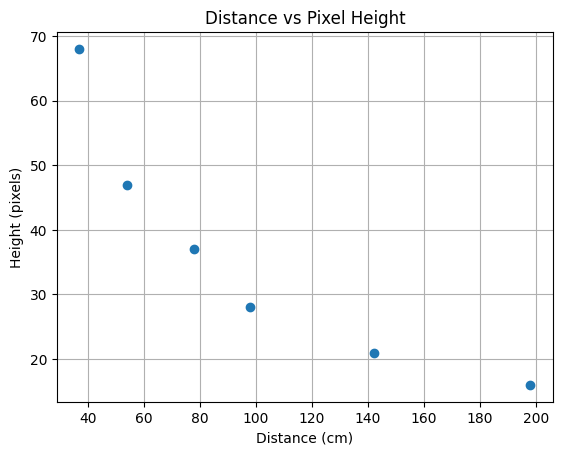

In [5]:
Z = np.array([37, 54, 78, 98, 142, 198]) # distance from camera in cm
v = np.array([68, 47, 37, 28, 21, 16]) # height in number of pixels
Y = 5.5 # height of obejct in cm

# Ocena - rzmerje glede oddaljenostjo od kamere in visina (st slikovnih elemntov y)
# Image 4 
# distance (Z) = 120
print("Predicted height in pixels (v):", 23.5)

# Create plot
plt.figure()
plt.plot(Z, v, 'o')  # 'o' for points/dots
plt.xlabel('Distance (cm)')
plt.ylabel('Height (pixels)')
plt.title('Distance vs Pixel Height')
plt.grid(True)

plt.show()

In [6]:
Z = np.array([37, 54, 78, 98, 142, 198]) # distance from camera in cm
v = np.array([68, 47, 37, 28, 21, 16]) # height in number of pixels
Y = 5.5 # height of obejct in cm

# Dejanska meritev: 
# 1. Dobimo f 
# (y * Z) / Y, OR v in pixels --> (v * Z) / Y
# f = (v * Z) / Y

f = np.zeros(len(Z))
for i in range(0, len(Z)):
    f[i] = (v[i] * Z[i]) / Y

#print(f)
f_mean = f.mean()
#print("Mean f:", f_mean)
# Not actual f in cm, just a factor beacuse v was unsed insted of y

# Image 4 
# distance (Z) = 120
# value of v: 23
expected = 23
predicted = 23.5
calculated = f_mean * Y / 120

# 2. Try to get value v based of f
# v = f * Y / Z
print("Predicted height in pixels (v):", predicted)
print("Calculated height in pixels (v):", calculated)
print("Actual height in pixels (v):", expected)

# error in percantega
rel_error = abs((calculated - expected) / expected) * 100
print(f"Error: {rel_error:.2f}%")

# povprecen f iz 6 slik
# nova slika - Z in Y -> dobimo v (actually st pixlov)
# ko uporabimo v za izracun f (v tem je vsteta DPI pretvorba) 

Predicted height in pixels (v): 23.5
Calculated height in pixels (v): 23.380555555555553
Actual height in pixels (v): 23
Error: 1.65%


## Naloga 2: Procesiranje slik

Namen te naloge je spoznavanje z osnovno funkcionalnostjo OpenCV in z zapisom slik v matrikah.

* Preberite sliko iz datoteke <i>umbrellas.jpg</i> z uporabo knjižnice OpenCV in jo prikažite z uporabo knjižnice MatPlotLib.

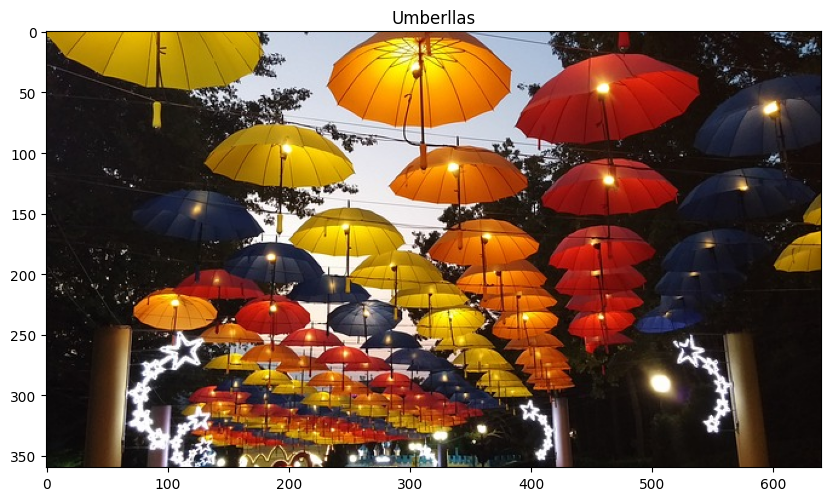

In [7]:
# Read image using OpenCV
# OpenCV reads images in BGR format
image_path = "resources/umbrellas.jpg"
image = cv2.imread(image_path)
if image is None:
    raise ValueError("Image could not be read. Check if the path is correct.")
    
def plot_image(image, title=""):
    # Convert BGR to RGB for correct color display in Matplotlib
    #image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Numpy
    # 1. Flip vertically (order of rows 1. dimension)
    # image[::-1]
    # 2. Flip horizontall (order of colums 2. dimension)
    # image[:, ::-1] 
    # :,  <-- leave dimension as it is 
    # 3. Order element components (3. dimension) - BGR -> RGB
    # image[:, :, ::-1]
    # :, :,  <-- leave 1., 2. (rows, columns) as it is
    # Also works: 
    # image[:, :, 2::-1]
    # image[:, :, [2,1,0]]
    img_rgb = image[:, :, ::-1]
    
    # Create figure and display image
    plt.figure(figsize=(10, 8))
    plt.imshow(img_rgb)
    plt.title(title)
    plt.show()

plot_image(image, "Umberllas")

* Slika, ki ste jo naložili ima tri kanale, RGB, in je spravljena v 3D matriko velikosti $visina \times sirina \times kanali = h \times w \times 3$. Na zaslon si izpišite velikost slike z uporabo ukaza <i>.shape</i> ter tip matrike z uporabo ukaza <i>.dtype</i>. Spremenite barvno sliko v sivinsko tako, da povprečite kanale in sliko zopet prikažite. Bodite pozorni na tip matrike, slika se namreč prebere v matriko tipa <i>uint8</i>, kjer element lahko zavzame samo vrednosti od $0$ do $255$. Računanje s takimi tipi je lahko problematično (npr. pri seštevanju pride do preliva, rezultat pa je napačen), zato matriko pred računanjem spremenite v drug tip, npr. <i>double</i>.

Shape:  (360, 640, 3)
Type:  uint8
Gray shape:  (360, 640)
Gray image shape:  (360, 640, 3)


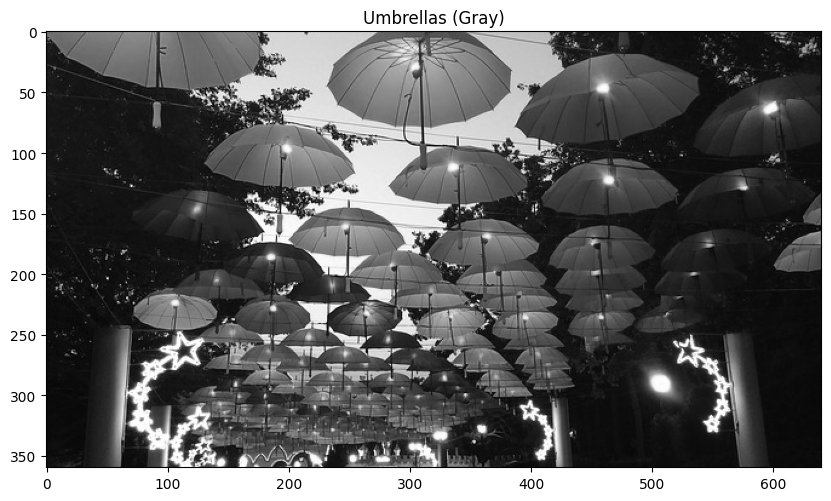

In [8]:
print("Shape: ", image.shape)
print("Type: ", image.dtype)
# Change to double and divide by 255 --> range [0,1]
# Payplot does show: double [0,1] OR Integer [0,255]
image_double = image.astype('float64') / 255
gray = (image_double[:, :, 0] + image_double[:, :, 1] + image_double[:, :, 2]) / 3
# 2D array -> 1 channel
print("Gray shape: ", gray.shape)

# Create grey image 3x gray array (stack)
# stack by depth (channels)
image_gray = np.dstack([gray, gray, gray])
print("Gray image shape: ", image_gray.shape)
plot_image(image_gray, "Umbrellas (Gray)")

* V zgornjem primeru se je slika izrisala s privzeto barvno tabelo. Barvna tabela pomeni način, kako vam MatPlotLib prikaže odtenek sivine. Na primer, temne odtenke lahko prikaže modro, svetle pa z rdečo. Poskusite spremeniti barvno tabelo v sliki s spreminjanjem parametra <i>cmap</i> funkcije <i>imshow</i>. Poskusite z vrednostmi <i>jet</i>, <i>bone</i>, <i>gray</i>.

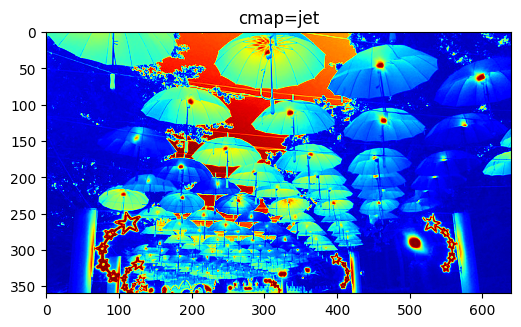

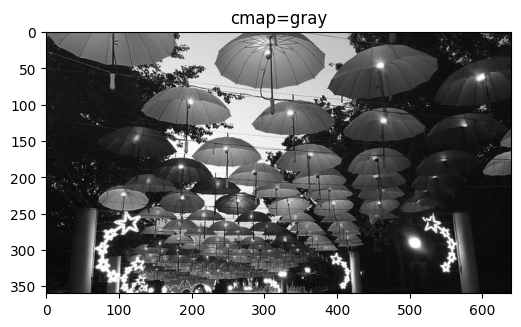

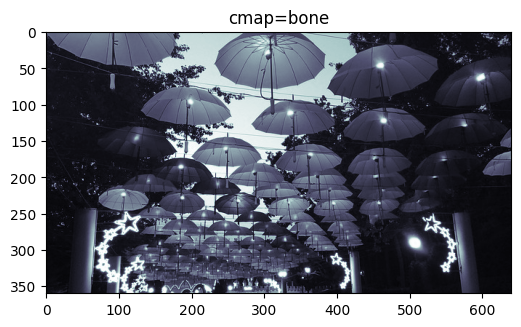

In [9]:
#plt.colormaps()
def plot_image_effect(image, effect, title=""):
    # Create figure and display image
    plt.figure(figsize=(6, 4))
    # cmap only works on 1D channel images
    # ignored on 3D channelS
    plt.imshow(image, cmap=effect)
    plt.title(title)
    plt.show()

plot_image_effect(gray, "jet", "cmap=jet") # map to colors
plot_image_effect(gray, "gray", "cmap=gray") # map to white - black 
plot_image_effect(gray, "bone", "cmap=bone") # white - black + blue tint

* Izrežite pravokotno regijo s slike in jo izrišite kot novo sliko. Regijo v prvi sliki bomo označili tako, da modri kanal postavimo na nič.

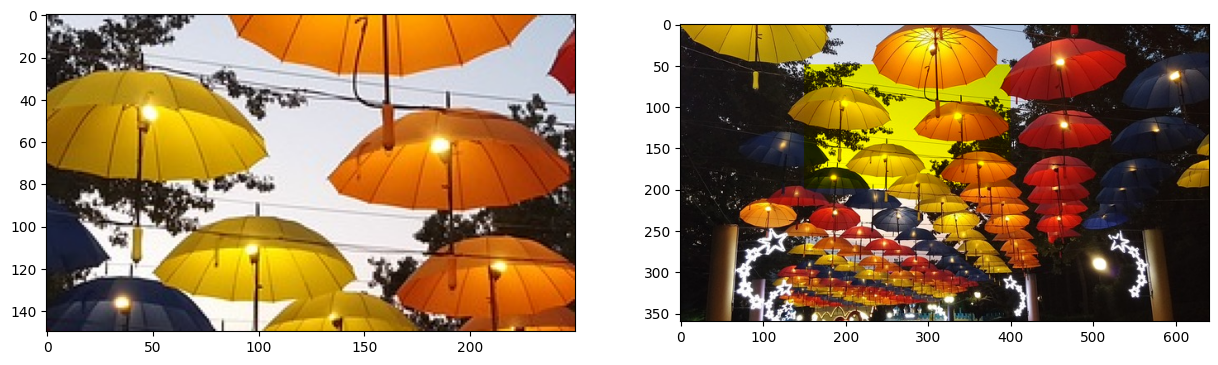

In [10]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
x = 150
y = 50
width = 250
height = 150
image_cut = image_rgb[y:y+height, x:x+width]
image_cut.shape

image_adjusted = image_rgb.copy()
# Set blue channel to 0
image_adjusted[y:y+height, x:x+width, 2] = 0

plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.imshow(image_cut)
plt.subplot(122)
plt.imshow(image_adjusted)

* Izrišite sivinsko sliko, kjer del sivinske verzije slike negirate. Razmislite, kako deluje negacija slike, če je ta zapisana v različnih podatkovnih tipih (uint8, float).

float64
(360, 640, 3)


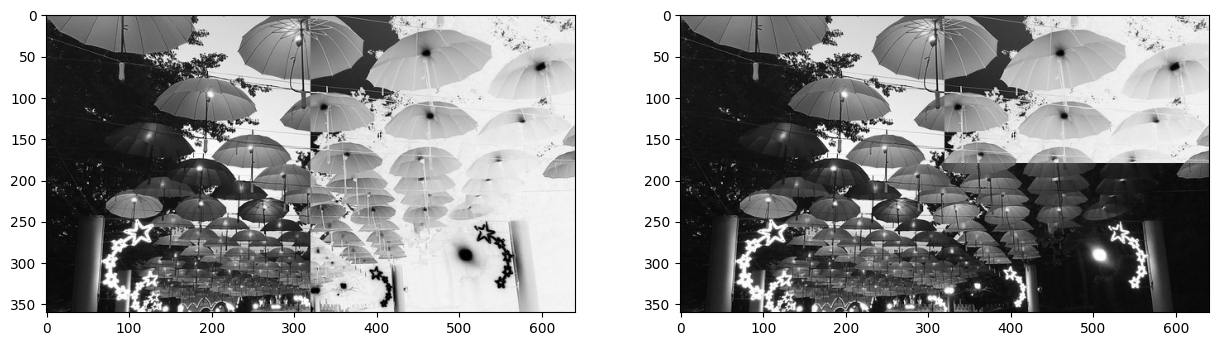

In [11]:
image_gray = np.dstack([gray, gray, gray])
print(image_gray.dtype)
print(image_gray.shape)
# Convert to integer array
image_gray_uint = (image_gray * 255).astype('uint8')

half_width = int(image_gray.shape[1]/2)
# :, half_width: (take all rows, start with width/2 till end columns)
half_height = int(image_gray.shape[0]/2)
# Float
image_gray[:, half_width:] = 1 - image_gray[:, half_width:]
# UInteger
image_gray_uint[:half_height, half_width:] = 255 - image_gray_uint[:half_height, half_width:]

plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.imshow(image_gray)
plt.subplot(122)
plt.imshow(image_gray_uint)

* Izrišite upragovano binarno sliko, v kateri vrednost $1$ označuje elemente, ki imajo v izhodiščni sliki sivinski nivo večji od $150$ in spremenite barvno lestvico v črnobelo.

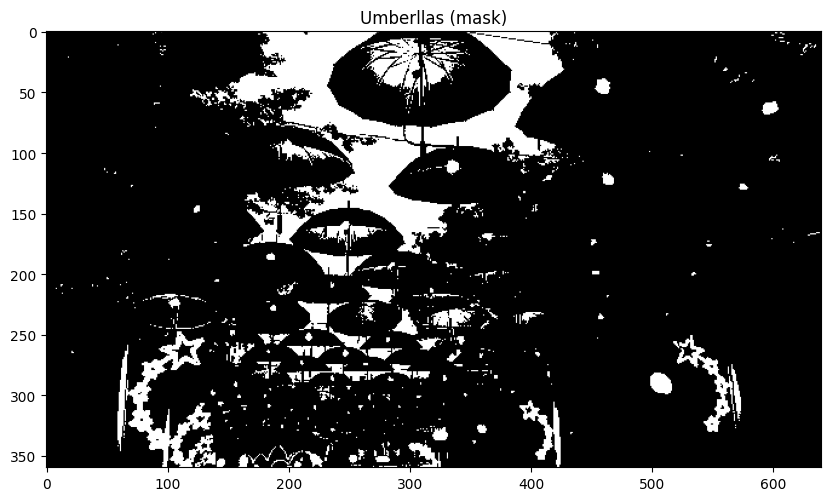

In [12]:
image_gray = np.dstack([gray, gray, gray])
image_gray = (image_gray * 255).astype('uint8')

mask = (image_gray >= 150)  # Returns True/False
# Convert T,F into 0,1
mask_uint = mask.astype("uint8")
# make 0 -> 0, 1 -> 255
binary = mask_uint * 255
# np.where
binary_np = np.where(image_gray >= 150, 255, 0)

plot_image(binary, "Umberllas (mask)")

## Naloga 3: Histogrami

V nadaljevanju si bomo ogledali, kako gradimo in prikazujemo histograme. Histogrami so zelo uporaben način opisa slike, s katerim lahko veliko povemo o porazdelitvi slikovnih elementov v sliki, s tem pa do neke mere tudi nekaj o vsebini slike. Zaradi njihove preprostosti in uporabnosti so zelo razširjeni, zato posvetite pozornost procesu grajenja, ki ga bomo opisali v tej nalogi.

Podana je $3$-bitna sivinska slika:

<center><img src="attachment:table_histogram_example.jpg" width="200px"></center>

* Določite histogram za podano sliko (v obliki tabele in z grafično predstavitvijo). Rešitev poslikajte in dodajte sliko v Jupyter notebook <i>(Edit -> Insert Image)</i>.

![hist](resources/notes/histogram.png)

 * Na podlagi izračunanega histograma določite kumulativni histogram slike. Rešitev poslikajte in dodajte sliko v Jupyter notebook <i>(Edit -> Insert Image)</i>.

![hist_cumulative](resources/notes/histogram_cumulative.png)

* Kakšen bi bil histogram, če bi bila slika $4$-bitna?

![hist_16bit](resources/notes/histogram_16bit.png)

* Računanje histograma je v MatPlotLib implementirano v okviru funkcije <i>hist</i>. Naložite sliko <i>umbrellas.jpg</i> in jo spremenite v sivinsko. Ker funkcija <i>hist()</i> ne deluje na slikah ampak na zaporedju vrednosti, moramo sliko najprej preoblikovati iz matrike velikosti $(N \times M)$ v $1$-D vektor velikosti $N M \times 1$, ta vektor pa se nato uporabi za izračun histograma. Prav tako je pomembno, da so vhodne vrednosti tipa <i>double</i>. Izrišite histograme za različno število celic.

True
Bins:  256
<BarContainer object of 256 artists>


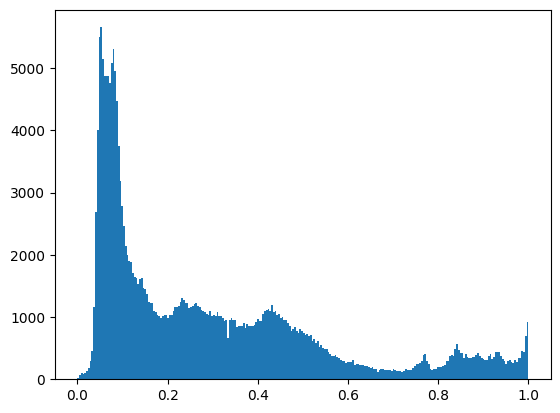

In [13]:
# gray = 2D array of floats
# Convert to 1D .ravel()
n, bins, patches = plt.hist(gray.ravel(), bins=256, range=[0,1])

# Check if number of elements match
print(n.sum() == gray.shape[0] * gray.shape[1])

#print(n)      # frequencies/counts for each bin
#print(bins)   # bin edges (0 to 1 in 256 steps)
print("Bins: ", len(n))
print(patches)  # BarContainer for plotting

Bins:  32
<BarContainer object of 32 artists>


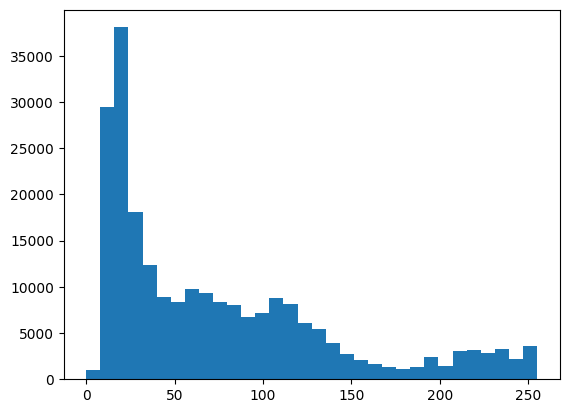

In [14]:
n, bins, patches = plt.hist((gray * 255).astype("uint8").ravel(), bins=32, range=[0,255])
print("Bins: ", len(n))
print(patches)

* V okviru naslednje točke boste implementirali operacijo <i>razteg histograma</i>. Z uporabo pripravljenega skeleta implementirajte funkcijo <i>histogram_stretch()</i>, ki vhodno sliko popravi tako, da njene vrednosti raztegne preko celotnega spektra sivinskih nivojev. Za okvirni potek algoritma se zgledujte po prosojnicah s predavanj. Ker funkcija opravlja enako operacijo na vseh slikovnih elementih slike, implementirajte celotno funkcijo brez zank z uporabo matričnih operacij.

Namigi: Za vhodno sliko lahko določite najvišjo $v_{max}$ in najnižjo $v_{min}$ sivinsko vrednost z <i>np.max(I)</i> in <i>np.min(I)</i>.

Pomembno: pri nalogi je prepovedana uporaba integriranih funkcij, izračun novih vrednosti morate implementirati sami.

Za preizkus funkcije preberite z diska datoteko <i>phone.jpg</i> (ki je že sivinska slika) in zanjo izrišite histogram z $256$ celicami. S histograma lahko opazite, da najnižja sivinska vrednost v sliki ni $0$, in najvišja ni $255$. Nato na sliki opravite razteg histograma ter prikažite rezultat v obliki slike in njenega histograma (histogrami naj vsebujejo $256$ celic).

![contrast_stretch](resources/notes/contrast_stretch.png)

In [15]:
def plot_hist(arr_1d):
    n, bins, patches = plt.hist(arr_1d, bins=256, range=[0,255])
    print(n.sum() == arr_1d.shape[0])
    print(patches)

def histogram_stretch(I):
    # Prevent overflow when subtracting with vmin
    I = I.astype(float) 
    vmin = np.min(I)
    vmax = np.max(I)
    print("Vmin:", vmin, "Vmax:", vmax)
    ratio = 255 / (vmax - vmin)
    #new_value = (value - vmin) * ratio 
    I = (I - vmin) * ratio

    # Set all negative values to 0 (subtraction correction)
    I = np.clip(I, 0, 255)
    return I.astype("uint8")

Vmin: 79.0 Vmax: 234.0
True
<BarContainer object of 256 artists>
True
<BarContainer object of 256 artists>


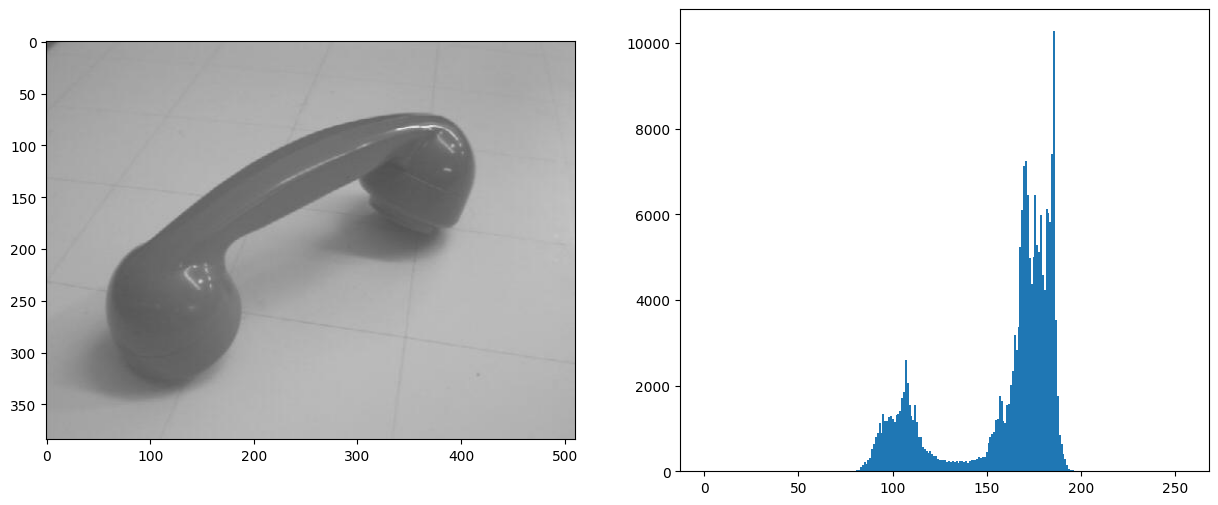

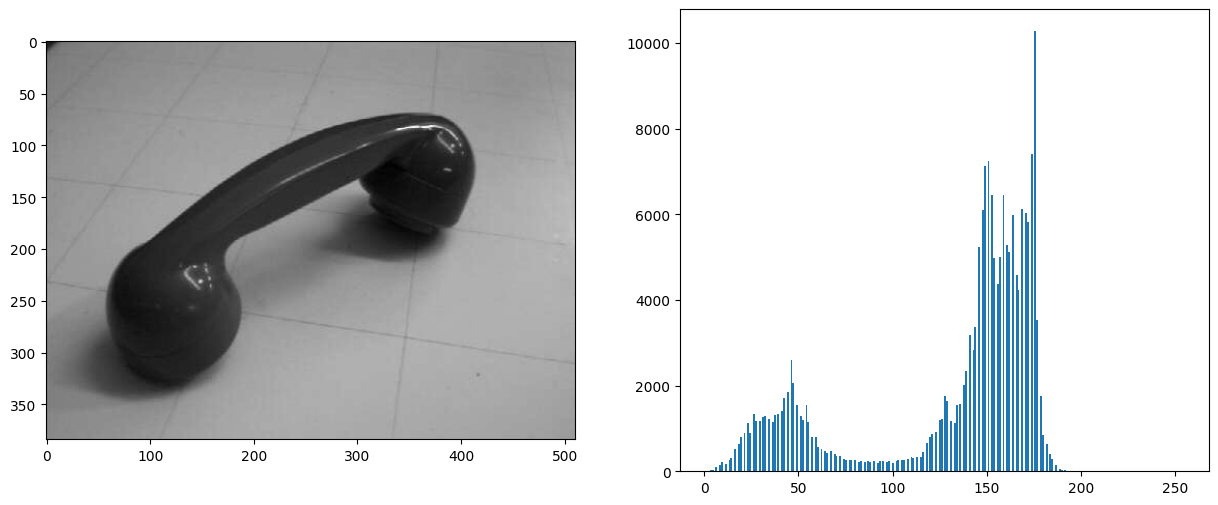

In [16]:
image_path = "resources/phone.jpg"
image = cv2.imread(image_path)
image_strached = histogram_stretch(image)

plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plot_hist(image[:,:,0].ravel())

plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.imshow(image_strached)
plt.subplot(122)
plot_hist(image_strached[:,:,0].ravel())

* Upragovanje slike je zelo uporabno pri implementaciji preproste detekcije objektov, vendar je določitev praga pogosto problematična. Preizkusite OpenCV funkcijo <i>threshold()</i>, ki zna določiti prag samodejno z uporabo različnih metod, vključno z <i>Otsu</i>-jevo metodo, ki temelji na analizi histograma slike.

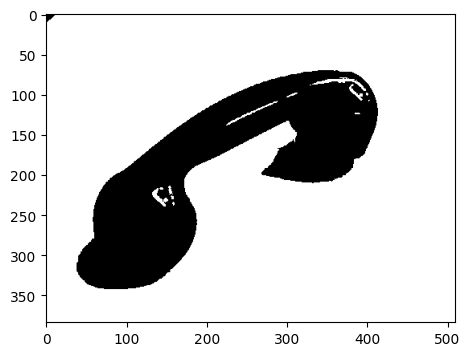

In [17]:
# cv2.threshold(source_image, threshold_value, max_value, threshold_type)
threshold = 130
ret, binary = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)

plot_image_effect(binary, "gray")

* Kakšen histogram je idealen za Otsu-jevo metodo, ali, povedano drugače, na kakšnih slikah ta metoda deluje dobro?

Tak, ki ima 2 hriba, med katera lahko postavimo prag. Zato ker metoda glede na threshold (prag) postavi versnoti na 0 ali 255. Deluje slabo ce imamo enakomerno porazdeljen histogram. Deluje najbolje na slikah, kjer so predmeti temne barve (1. hirb) in ozadje svetle (2. hrib) ALI obratno. 

## Naloga 4: Barvni prostori

Kot ste slišali že na predavanjih, lahko barvo zapišemo v različnih barvnih prostorih. Vsak barvni prostor ima svoje značilnosti. V okviru naloge si boste pogledali, kako lahko s pretvorbo med RGB in HSV barvnima prostoroma na preprost način dosežemo zanimive rezultate. Najprej pa dve računski nalogi, v okviru katerih boste osvežili poznavanje algoritmov pretvorbe, ki ste jih spoznali na predavanjih (so napisani v prosojnicah):

* Barvo, zapisano v RGB barvnem prostoru z $(255, 34, 126)$ bi radi preslikali v barvni prostor HSV. Ročno izvedite postopek preslikave in izračunajte rezultat pretvorbe. Rešitev in postopek poslikajte ter vstavite v Jupyter Notebook.

![rgb_to_hsv](resources/notes/rgbToHsv.png)

* Barvo, zapisano v HSV barvnem prostoru z $(0.65, 0.7, 0.15)$ bi radi preslikali v barvni prostor RGB. Ročno izvedite postopek preslikave in izračunajte rezultat pretvorbe. Rešitev in postopek poslikajte ter vstavite v Jupyter Notebook.

![hsv_to_rgb](resources/notes/hsvToRgb.png)

* Oglejmo si pretvorbo med barvnimi prostori na konkretnem primeru z uporabo OpenCV funkcije <i>cvtColor()</i>. Preberimo sliko <i>trucks.jpg</i> ter jo prikažite na zaslonu kot RGB sliko ter vsako komponento posebej kot sivinsko sliko. Nato bomo pretvorili prebrano sliko v HSV barvni prostor z uporabo funkcije <i>cvtColor()</i> ter prikazali na zaslonu vsako komponento posebej kot sivinsko sliko. Potrebno je paziti na pravilno obravnavo tipov matrik, saj je RGB slika privzeto shranjena v matriki tipa <i>uint8</i> (cela števila od $0$ do $255$), slika v barvnem prostoru HSV pa v matriki tipa <i>double</i> (realna števila od $0$ do $1$).


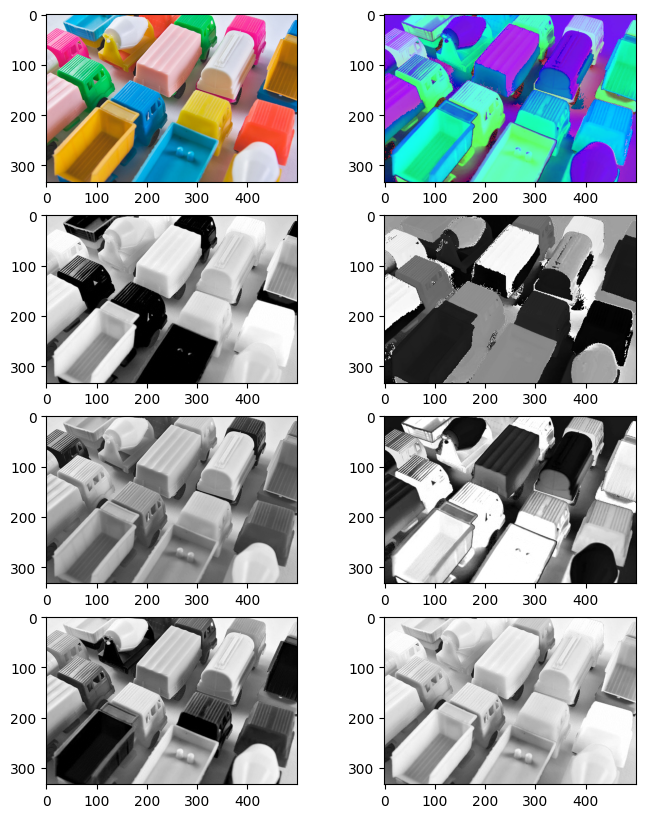

In [18]:
import cv2
import matplotlib.pyplot as plt

I_trucks_bgr = cv2.imread('resources/trucks.jpg')
I_trucks_rgb = cv2.cvtColor(I_trucks_bgr, cv2.COLOR_BGR2RGB)
I_trucks_hsv = cv2.cvtColor(I_trucks_bgr, cv2.COLOR_BGR2HSV)

plt.figure(figsize=(8, 10))
plt.subplot(421)
plt.imshow(I_trucks_rgb)  # RGB slika
plt.subplot(422)
plt.imshow(I_trucks_hsv, cmap=plt.cm.hsv)  # HSV slika
plt.subplot(423)
plt.imshow(I_trucks_rgb[:,:,0], cmap='gray')  # Red komponenta
plt.subplot(424)
plt.imshow(I_trucks_hsv[:,:,0], cmap='gray')  # Hue komponenta
plt.subplot(425)
plt.imshow(I_trucks_rgb[:,:,1], cmap='gray')  # Green komponenta
plt.subplot(426)
plt.imshow(I_trucks_hsv[:,:,1], cmap='gray')  # Saturation komponenta
plt.subplot(427)
plt.imshow(I_trucks_rgb[:,:,2], cmap='gray')  # Blue komponenta
plt.subplot(428)
plt.imshow(I_trucks_hsv[:,:,2], cmap='gray')  # Value (Intensity) komponenta

plt.show()

* Različni barvni prostori so koristni tudi, ko pride do upragovanja. V RGB barvnem prostoru je recimo težko na preprost način določiti področja, ki pripadajo določenemu barvnemu odtenku. Napišite skripto, ki sliko <i>trucks.jpg</i> upraguje po modrem kanalu za vrednost praga $150$. Prikažite originalno sliko ter binarno sliko eno ob drugi.

In [19]:
def apply_mask(I, mask):
    mask = mask.astype("uint8")
    # Create 3D mask
    mask_3d = np.zeros_like(I)
    for i in range(3):
        mask_3d[:,:,i] = mask
    return I * mask_3d

Text(0.5, 1.0, 'Applied mask')

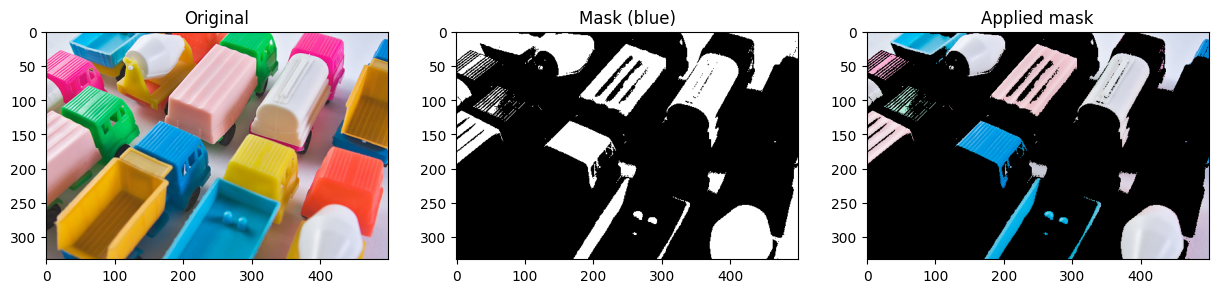

In [20]:
#plt.imshow(I_trucks_rgb[:,:,2], cmap='gray')  # Blue komponenta
blue_comp_rgb = I_trucks_rgb[:,:,2]
binary_blue = np.where(blue_comp_rgb >= 200, 1, 0)

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(I_trucks_rgb)
plt.title("Original")
plt.subplot(132)
plt.imshow(binary_blue, cmap='gray')
plt.title("Mask (blue)")
plt.subplot(133)
plt.imshow(apply_mask(I_trucks_rgb, binary_blue))
plt.title("Applied mask")

* Za osnovne komponene (rdeča, zelena, modra) se upragovanje poenostavi, če sliko preslikamo v normalizirani RGB prostor, kjer je vrednost vsake barve deljena z vsoto vrednosti vseh treh komponent (takemu prostoru rečemo tudi <i>normalizirani RGB</i>). Napišite kodo, ki modro komponento slike po celicah deli z vsoto soležnih treh barvnih komponent (uporabite funkcijo <i>np.sum</i>). Na tako sliko aplicirajte upragovanje (ker so normalizirane vrednosti definirane na razponu vrednosti od $0$ do $1$ je treba prag prilagoditi. Eksperimentirajte z vrednostmi okoli $0.5$ ter upragovano sliko prikažite.


Text(0.5, 1.0, 'Applied mask')

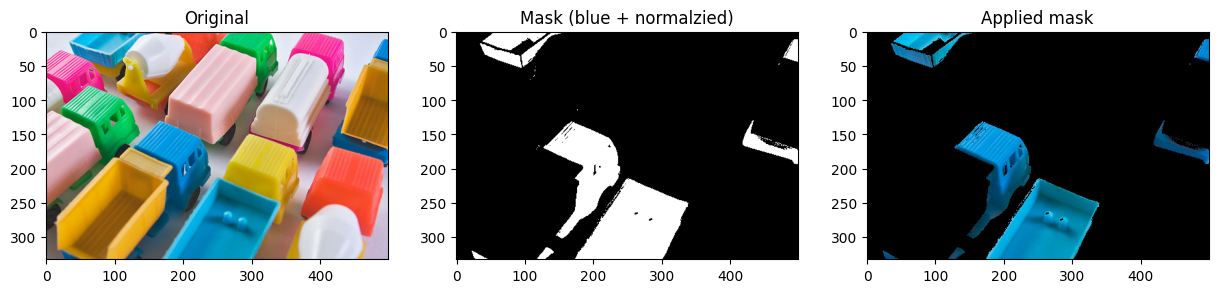

In [21]:
# Prispevek modre
# 1. Non-nomralized
# - blue (255)
# - white (255) - same as blue (problem)
# 2. Normalized
# - blue (1)
# - white (0.33) - better
# make sum by 2 axis (channels) and divide by 3
sum_of_channels = np.sum(I_trucks_rgb, axis=2, keepdims=True)
normalized_rgb = I_trucks_rgb[:,:,:] / sum_of_channels
normalzied_blue_comp = normalized_rgb[:,:,2]

binary_normalized_blue = np.where(normalzied_blue_comp >= 0.45, 1, 0)

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(I_trucks_rgb)
plt.title("Original")
plt.subplot(132)
plt.imshow(binary_normalized_blue, cmap='gray')
plt.title("Mask (blue + normalzied)")
plt.subplot(133)
plt.imshow(apply_mask(I_trucks_rgb, binary_normalized_blue))
plt.title("Applied mask")

* Na tak način lahko določimo regije rdeče, zelene in modre barve. Če pa bi želeli izluščiti poljuben odtenek, se je najbolj intuitivno poslužiti preslikave v HSV barvni prostor. Dodajte kodo, ki sliko iz RGB barvnega prostora preslika v HSV prostor ter upragujte po komponenti odtenka (Hue). Ker zavzema modra barva samo del vrednostnega območja, je potrebno sliko upragovati z dvema pragoma. To se najhitreje reši kot logična funkcija dveh mask (vsako dobimo z uporabo enega praga). Primer: $AB = A \& B$. V pomoč pri določitvi pragov za modro barvo lahko uporabite naslednjo kodo, ki vam prikaže barvni spekter cele komponente odtenka:

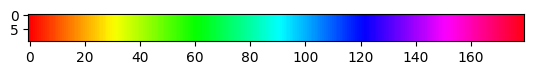

In [22]:
import numpy as np
plt.figure()
plt.imshow(np.meshgrid(np.linspace(0, 1, 180), np.ones((10, 1)))[0], cmap=plt.cm.hsv)
plt.show()

Text(0.5, 1.0, 'Applied mask')

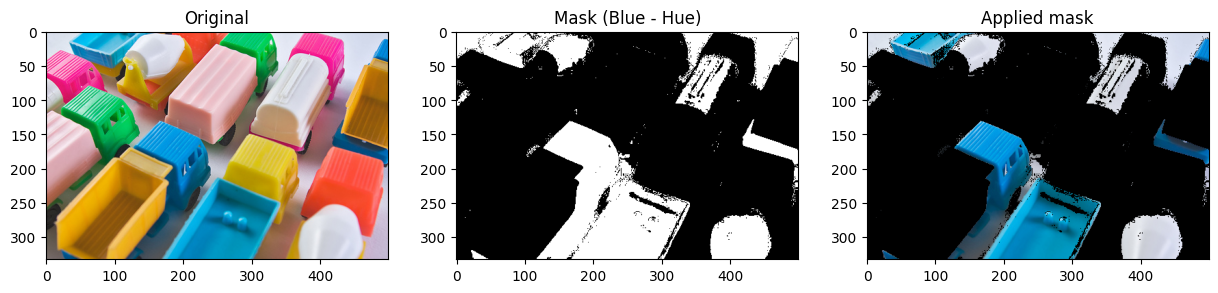

In [23]:
# Hue [0, 359] (circle) opencv -> [0, 179] 8bit optimization
mask = (I_trucks_hsv[:,:,0] > 95) & (I_trucks_hsv[:,:,0] < 120)
blue_comp_binary = np.where(mask, 1, 0)

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(I_trucks_rgb)
plt.title("Original")
plt.subplot(132)
plt.imshow(blue_comp_binary, cmap='gray')
plt.title("Mask (Blue - Hue)")
plt.subplot(133)
plt.imshow(apply_mask(I_trucks_rgb, blue_comp_binary))
plt.title("Applied mask")

Text(0.5, 1.0, 'Applied mask')

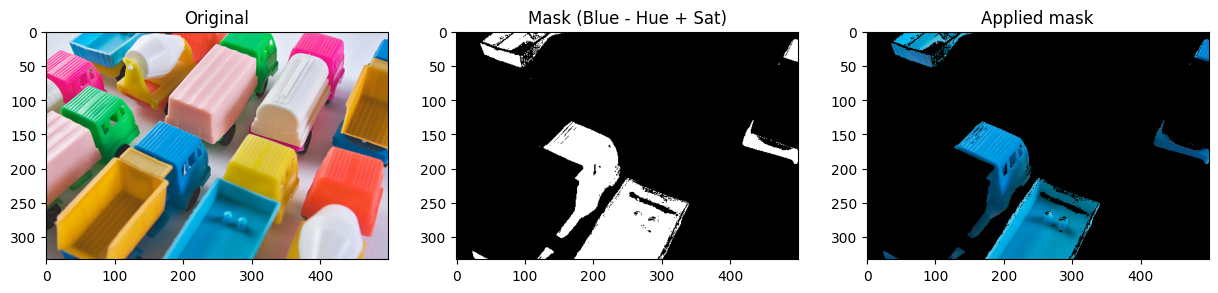

In [24]:
# Hue [0, 359] (circle) opencv -> [0, 179] 8bit optimization
# Low saturation - white colors
mask = (I_trucks_hsv[:,:,0] > 95) & (I_trucks_hsv[:,:,0] < 120) & (I_trucks_hsv[:,:,1] > 150)
blue_comp_binary = np.where(mask, 1, 0)


plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(I_trucks_rgb)
plt.title("Original")
plt.subplot(132)
plt.imshow(blue_comp_binary, cmap='gray')
plt.title("Mask (Blue - Hue + Sat)")
plt.subplot(133)
plt.imshow(apply_mask(I_trucks_rgb, blue_comp_binary))
plt.title("Applied mask")

* Eksperimentirajte z robnimi vrednostmi območja ter optimalno upragovano sliko prikažite. Postopek ponovite za poljubno izbrano sliko (sliko si izberite sami, prav tako si izberite barvo, ki bi jo radi izluščili iz slike).

Text(0.5, 1.0, 'Applied mask')

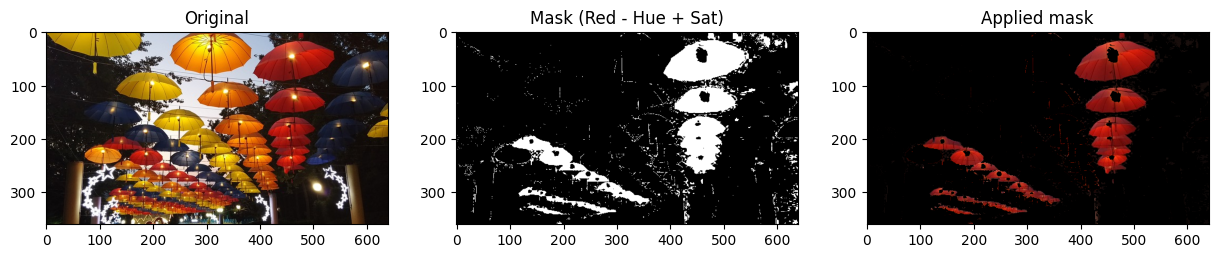

In [25]:
image_path = "resources/umbrellas.jpg"
I_umbrellas_bgr = cv2.imread(image_path)
I_umbrellas_rgb = cv2.cvtColor(I_umbrellas_bgr, cv2.COLOR_BGR2RGB)
I_umbrellas_hsv = cv2.cvtColor(I_umbrellas_bgr, cv2.COLOR_BGR2HSV)

mask = ((I_umbrellas_hsv[:,:,0] > 170) | (I_umbrellas_hsv[:,:,0] < 7)) & (I_umbrellas_hsv[:,:,1] > 100)
red_comp_binary = np.where(mask, 1, 0)

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(I_umbrellas_rgb)
plt.title("Original")
plt.subplot(132)
plt.imshow(red_comp_binary, cmap='gray')
plt.title("Mask (Red - Hue + Sat)")
plt.subplot(133)
plt.imshow(apply_mask(I_umbrellas_rgb, red_comp_binary))
plt.title("Applied mask")

* Implementirajte funkcijo <i>im_mask</i>, ki ji lahko podate sliko v RGB barvnem prostoru ter binarno sliko iste velikosti, funkcija pa vam vrne barvno sliko, kjer je barva slikovnih elementov postavljena na črno, če je vrednost soležnega elementa v maski $0$. Funkcijo implementirajte brez eksplicitnih zank.

Text(0.5, 1.0, 'Inverted mask')

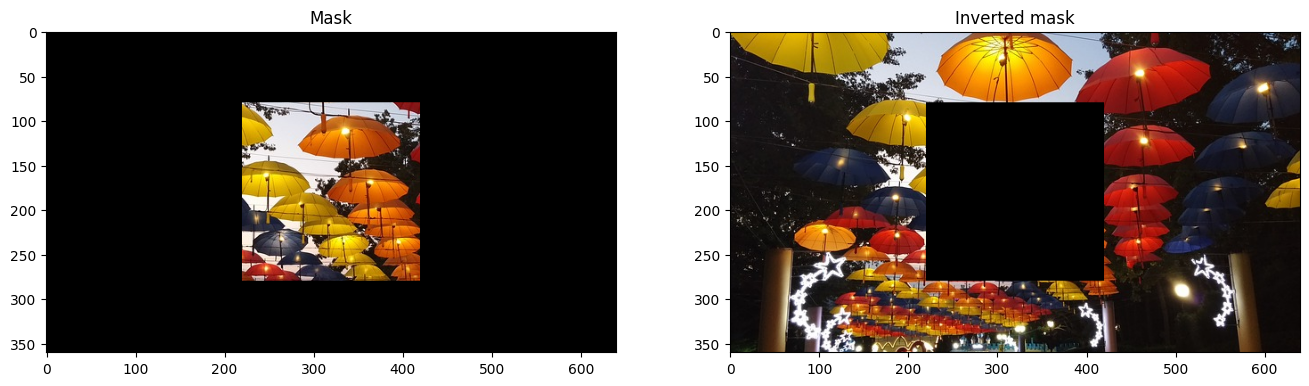

In [26]:
image_path = "resources/umbrellas.jpg"
I_umbrellas_bgr = cv2.imread(image_path)
I_umbrellas_rgb = cv2.cvtColor(I_umbrellas_bgr, cv2.COLOR_BGR2RGB)

width = I_umbrellas_rgb.shape[1]
height = I_umbrellas_rgb.shape[0]
mask = np.zeros(shape=(height, width))
mask[int(height/2-100):int(height/2+100), int(width/2-100):int(width/2+100)] = 1
inverted_mask = 1 - mask

def im_mask(I, mask):
    # Mask type of numpy
    # Create 3D mask
    mask_3d = np.zeros_like(I)
    for i in range(3):
        mask_3d[:,:,i] = mask
    return I * mask_3d

plt.figure(figsize=(25, 8))
plt.subplot(131)
plt.imshow(im_mask(I_umbrellas_rgb, mask))
plt.title("Mask")
plt.subplot(132)
plt.imshow(im_mask(I_umbrellas_rgb, inverted_mask))
plt.title("Inverted mask")

## Naloga 5: Regije in morfološke operacije

V tej nalogi si boste ogledali kako iz binarne slike izluščiti posamezne regije, kako te regije zapisati na različne načine, ter, kako si lahko z uporabo morfoloških operacijpomagamo pri detekciji regij v šumnih slikah.

Za razčlenitev regij na sliki se zaradi njegove časovne predvidljivosti najpogostejeuporablja algoritem zaporednega označevanja regij, oziroma povezanih komponent, kiste ga obravnavali na predavanjih. Za začetek ponovimo delovanje algoritma z ročnimreševanjem preprostega primera:

* Podana je črno-bela slika za katero določite rezultat algoritma barvanja regij po prvem in drugem sprehodu po sliki ter povezave med oznakami za okolico $\mathcal{N}_4$. Na sliki so z $1$ označena področja objektov v sliki, celice z vrednostjo $0$ pa so ozadje. Rešitev in postopek poslikajte in vstavite v Jupyter Notebook.

$$A = \begin{bmatrix} 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & 1 \\ 0 & 1 & 0 & 1 & 0 & 0 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 0 & 1 & 0 & 0 & 0 \\ 1 & 0 & 0 & 1 & 1 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 \\ 0 & 1 & 0 & 0 & 0 & 1 & 1 & 1 & 1 \\ 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \end{bmatrix}$$  

![component_color](resources/notes/component_color.png)

* Preberite sliko <i>regions.png</i>. Kljub temu, da slika vsebuje zgolj dve vrednosti, ni shranjena v tipu binarnih logičnih vrednosti, zato jo najprej spremenitev binarno z uporabo funkcije <i>threshold</i> in uporabo ustreznega praga (recimo $127$). Uporabite funkcijo <i>connectedComponents()</i>, ki implementira algoritem označevanja povezanih regij. Izpišite število regij (vključno z ozadjem) in prikažite maske, ki označujejo posamezne regije.

Number of components (including background): 4
Component labels range from 0 to 3


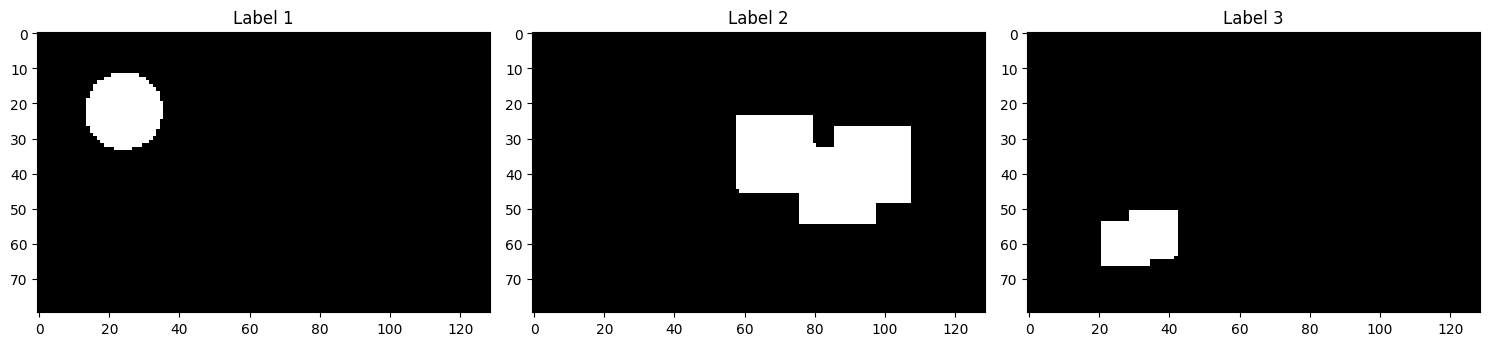

In [27]:
image_path = "resources/regions.png"
I_regions = cv2.imread(image_path)
# Convert bgr(3 channel) to greyscale (1 channel)
regions_gray = cv2.cvtColor(I_regions, cv2.COLOR_BGR2GRAY)
# Binarize grey scale [0, 1]
_, binary = cv2.threshold(regions_gray, 127, 255, cv2.THRESH_BINARY)
# Mark with labels
num_labels, labels = cv2.connectedComponents(binary)
    
# Print basic info
print(f"Number of components (including background): {num_labels}")
print(f"Component labels range from 0 to {num_labels-1}")


plt.figure(figsize=(15, 5))

plt.subplot(131)
mask1 = (labels == 1)
plt.imshow(mask1, cmap='gray')
plt.title('Label 1')
plt.subplot(132)
mask2 = (labels == 2)
plt.imshow(mask2, cmap='gray')
plt.title('Label 2')
plt.subplot(133)
mask3 = (labels == 3)
plt.imshow(mask3, cmap='gray')
plt.title('Label 3')
plt.tight_layout()
plt.show()

* Za posamezne regije iz prejšnje naloge določite centroid ter okvir okoli regije (BoundingBox). Navedene lastnosti prikažite nad sliko maske.

Namig: za izris centroidov uporabite PyPlot funkcijo <a href="https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.scatter.html"><i>scatter</i></a>, za izris pravokotnikov pa PyPlot funkcijo <a href="https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Rectangle.html"><i>Rectangle()</i></a>.

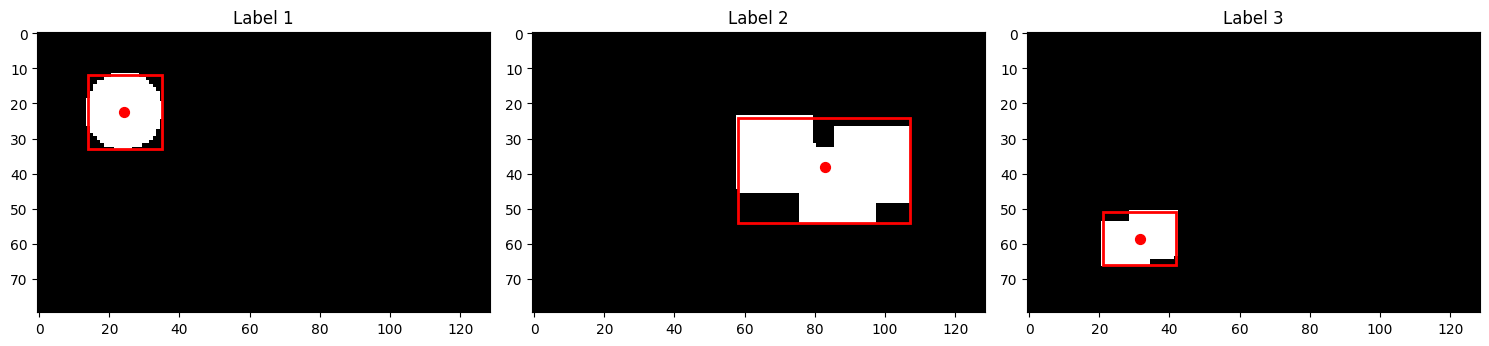

In [28]:
from matplotlib.patches import Rectangle

plt.figure(figsize=(15, 5))

for label in range(1, 4):
    plt.subplot(1, 3, label)
    mask = (labels == label)
    plt.imshow(mask, cmap='gray')
    
    # Get coordinates which are not zero 
    # From mask where current index == nmm in labels
    y, x = np.nonzero(mask)
    
    # Calculate centroid
    # Get average of x and y coordinates
    centroid_x = np.mean(x)
    centroid_y = np.mean(y)
    
    # Find bounding box
    xmin, ymin = np.min(x), np.min(y)
    xmax, ymax = np.max(x), np.max(y)
    width = xmax - xmin
    height = ymax - ymin
    
    # Plot centroid
    plt.scatter(centroid_x, centroid_y, color='red', s=50)
    
    # Plot bounding box - try adjusting the starting point
    plt.gca().add_patch(Rectangle((xmin, ymin), width, height, 
                                fill=False, color='red', linewidth=2))

    # A pixel at position (14, 12) actually covers the area from (13.5, 11.5) to (14.5, 12.5)
    # When we want to draw a box around pixels, we need to start at the edge of the first pixel (xmin-0.5, ymin-0.5)
    # This ensures the box perfectly aligns with the pixel edges
    
    plt.title(f'Label {label}')

plt.tight_layout()
plt.show()

Na žalost binarne slike, pridobljene iz realnih podatkov, pogosto niso tako lepe kot slike, s katerimi smo delali do sedaj. V realnih slikah je veliko šuma, ki se v binarni sliki odraža kot drobne regije ali luknjice v regijah, ki motijo nadaljnje procesiranje. V takih primerih so zelo priročne morfološke operacije, s pomočjo katerih lahko tak šum odpravimo. V okviru te naloge bomo spoznali morfološki operaciji skrči (<i>erode</i>) in razširi (<i>dilate</i>) v kontekstu odstranjevanja šuma iz binarne slike.

Najprej na kratko ponovite delovanje obeh operacij z naslednjo nalogo: 

* Podana je črno-bela slika $A$ za katero določite rezultat algoritma filtriranja s filtroma razširi ter skrči za jedro $K$. Rešitev poslikajte in vstavite v Jupyter Notebook.

$$K = \begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 0 & 1 & 0 \end{bmatrix}$$

$$A = \begin{bmatrix} 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 & 0 & 0 & 1 & 1 & 0 \\ 1 & 1 & 1 & 1 & 0 & 1 & 0 & 0 & 0 \\ 1 & 0 & 0 & 1 & 1 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 1 & 0 \\ 0 & 1 & 0 & 0 & 0 & 1 & 1 & 1 & 0 \end{bmatrix}$$  

![dialate_erode](resources/notes/dialate_erode.png)

* Naložite sliko <i>regions_noise.png</i>, jo spremenite v črno-belo in nato binarizirajte z uporabo ustreznega praga. Uporabite funkcijo <i>connectedComponents()</i> za določitev regij in regije preštejte. Kaj opazite? Kako velike so posamezne regije?

Number of components (including background): 78
Component labels range from 0 to 77
[8360, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 377, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1193, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 309, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]


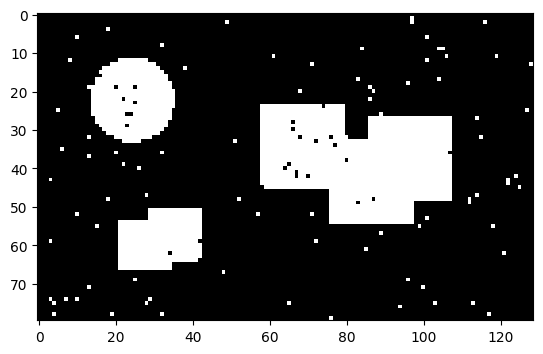

In [29]:
image_path = "resources/regions_noise.png"
I_regions_noise = cv2.imread(image_path)
# Convert bgr(3 channel) to greyscale (1 channel)
regions_noise_gray = cv2.cvtColor(I_regions_noise, cv2.COLOR_BGR2GRAY)
# Binarize grey scale [0, 1]
_, binary = cv2.threshold(regions_noise_gray, 127, 255, cv2.THRESH_BINARY)  
# Mark with labels
num_labels, labels = cv2.connectedComponents(binary)
    
# Print basic info
print(f"Number of components (including background): {num_labels}")
print(f"Component labels range from 0 to {num_labels-1}")
pixels_per_label = [int((labels == i).sum()) for i in range(num_labels)]
print(pixels_per_label)
plt.imshow(binary, cmap='gray')  

* Na sliki preizkusite OpenCV funkciji <i>dilate()</i> in <i>erode()</i> ter vizualizirajte njiune rezultate.

Text(0.5, 1.0, 'Erode')

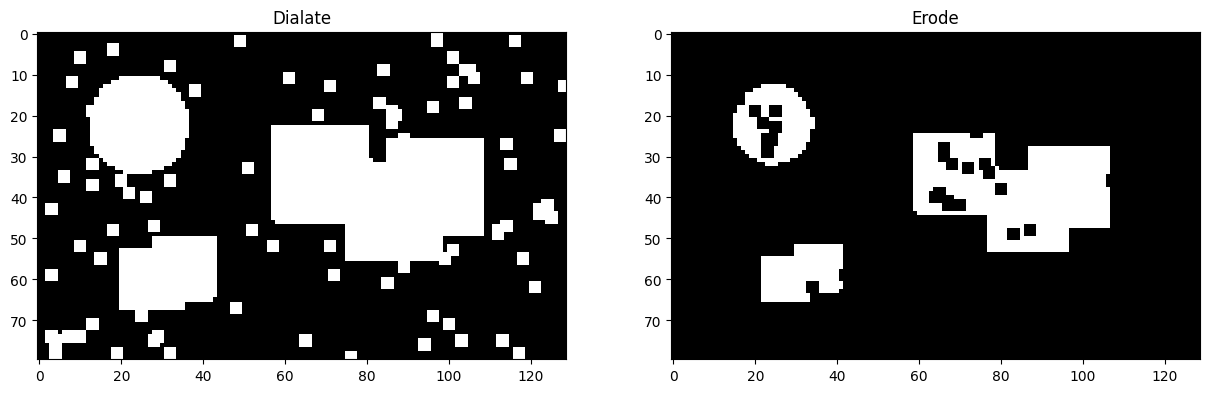

In [30]:
# Inicializacija preprostega jedra
kernel = np.ones((3, 3), np.uint8)

dilated = cv2.dilate(binary, kernel, iterations=1)
eroded = cv2.erode(binary, kernel, iterations=1)
 
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.imshow(dilated, cmap='gray')  
plt.title("Dialate")
plt.subplot(122)
plt.imshow(eroded, cmap='gray') 
plt.title("Erode")

* S pomočjo kombinacije funkcij <i>erode()</i> in <i>dilate()</i> implementirajte še operaciji odpiranja (<i>opening</i>) in zapiranja (<i>closing</i>) ter rezultat primerjajte z vgrajenima funkcijama implementiranima v sklopu OpenCV funkcije <i>morphologyEx()</i>. Prikažite rezultat obeh operacij na upragovani sliki <i>regions_noise.png</i>. Glede na rezultate premislite, kako bi odpravi celoten šum, ki je prisoten v izvorni binarni sliki? Rešitev implementirajte in preizkusite.

Text(0.5, 1.0, 'Opening (morph)')

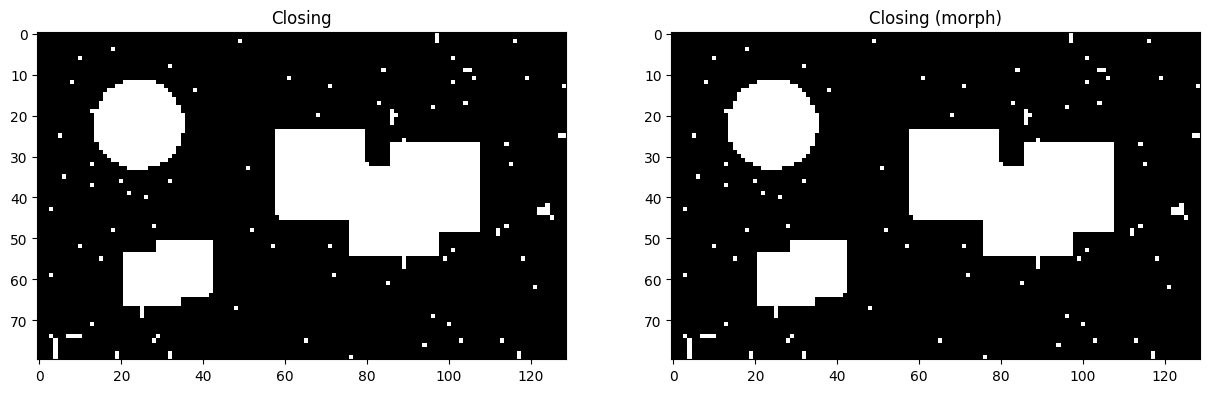

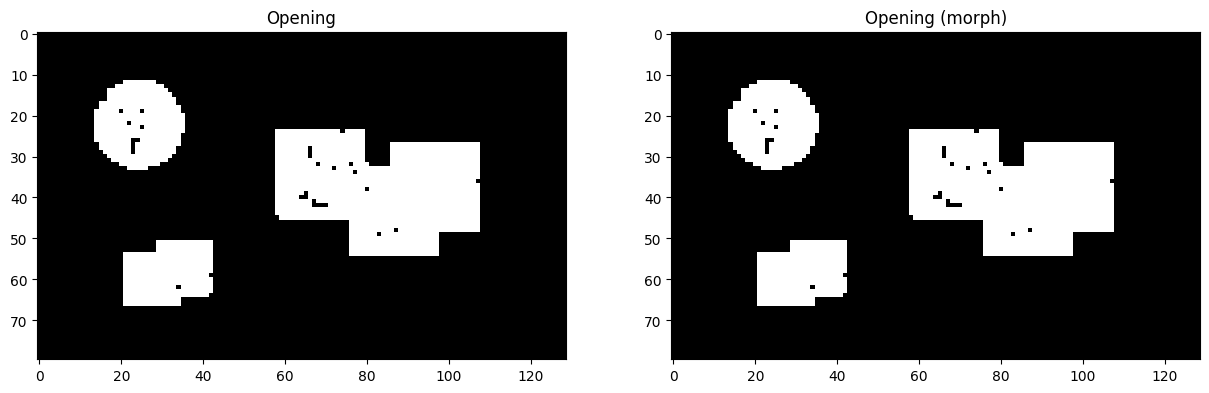

In [31]:
closing = cv2.erode(cv2.dilate(binary, kernel), kernel)
closing_morph = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.imshow(closing, cmap='gray')  
plt.title("Closing")
plt.subplot(122)
plt.imshow(closing_morph, cmap='gray') 
plt.title("Closing (morph)")

opening = cv2.dilate(cv2.erode(binary, kernel), kernel)
opening_morph = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.imshow(opening, cmap='gray')  
plt.title("Opening")
plt.subplot(122)
plt.imshow(opening_morph, cmap='gray') 
plt.title("Opening (morph)")

Text(0.5, 1.0, 'Opening (2x dialation)')

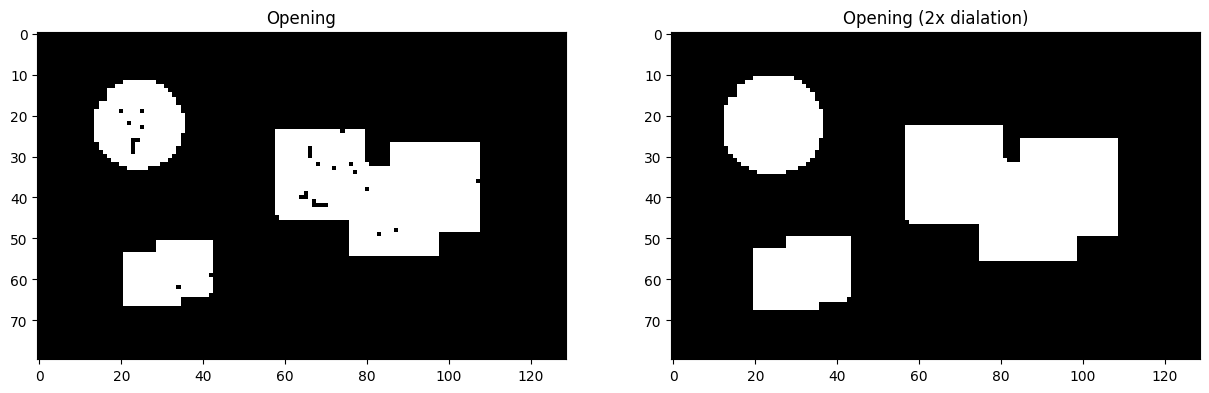

In [32]:
opening = cv2.dilate(cv2.erode(binary, kernel), kernel)
opening_2x = cv2.dilate(cv2.erode(binary, kernel), kernel, iterations=2)

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.imshow(opening, cmap='gray')  
plt.title("Opening")
plt.subplot(122)
plt.imshow(opening_2x, cmap='gray') 
plt.title("Opening (2x dialation)")

<b>$\star$ (10 točk)</b> Pridobljeno znanje o uporabi morfoloških operacij preizkusite še na bolj realnem primeru. Preberite sliko <i>bird.jpg</i>, spremenite jo v sivinsko ter določite prag, da dobite čim boljšo masko objekta. Ker popolne maske ne morete dobiti samo z globalnim pragom, jo izboljšajte z uporabo morfoloških operacij. Število točk, ki jih boste dobili za nalogo je odvisno od kakovosti rezultata.

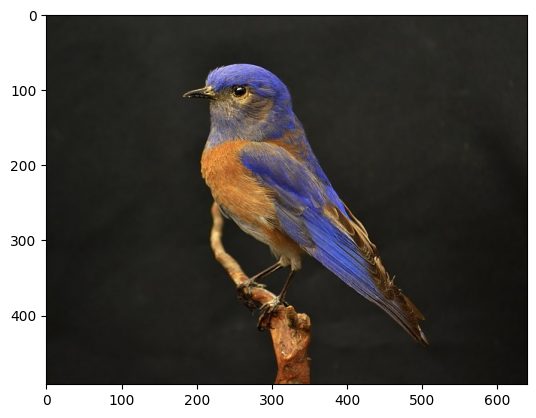

In [33]:
image_path = "resources/bird.jpg"
I_bird = cv2.imread(image_path)
# Convert bgr(3 channel) to greyscale (1 channel)
I_bird_rgb = cv2.cvtColor(I_bird, cv2.COLOR_BGR2RGB)
I_bird_gray = cv2.cvtColor(I_bird, cv2.COLOR_BGR2GRAY)

plt.imshow(I_bird_rgb)

def apply_mask(I, mask):
    # Create 3D mask
    mask_3d = np.zeros_like(I)
    for i in range(3):
        mask_3d[:,:,i] = mask
    # Convert mask from [0, 255] to [0, 1]
    I_out = I * (mask_3d.astype(float) / 255.0)
    return I_out

In [34]:
# Binarize grey scale [0, 1]
_, binary_50 = cv2.threshold(I_bird_gray, 55, 255, cv2.THRESH_BINARY)  
_, binary_90 = cv2.threshold(I_bird_gray, 90, 255, cv2.THRESH_BINARY)
#plt.imshow(binary, cmap='gray') 

kernel_size = [3,3]
dilate_iterations = 4
erode_iterations = 1
cross_kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (kernel_size))
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, ([3,3]))
ellip_kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, ([6,6]))
kernel = np.ones((kernel_size), np.uint8)

# closing = cv2.erode(cv2.dilate(binary, kernel, iterations=dilate_iterations), kernel)
# closing_cross = cv2.erode(cv2.dilate(binary, kernel, iterations=dilate_iterations+1), cross_kernel, iterations=erode_iterations-1)
# closing_rect = cv2.erode(cv2.dilate(binary, kernel, iterations=dilate_iterations+2), rect_kernel, iterations=erode_iterations)

# kernel_90 = cv2.getStructuringElement(cv2.MORPH_CROSS, ([4,4]))
# closing_90 = cv2.erode(cv2.dilate(binary_90, kernel, iterations=dilate_iterations-2), kernel_90)
#closing_50 = cv2.erode(cv2.dilate(binary_50, kernel, iterations=dilate_iterations-2), kernel_50)

kernel_33 = cv2.getStructuringElement(cv2.MORPH_CROSS, ([3,3]))
kernel_44 = cv2.getStructuringElement(cv2.MORPH_CROSS, ([4,4]))
kernel_88 = cv2.getStructuringElement(cv2.MORPH_CROSS, ([8,8]))

Text(0.5, 1.0, 'Applied mask (+ branch)')

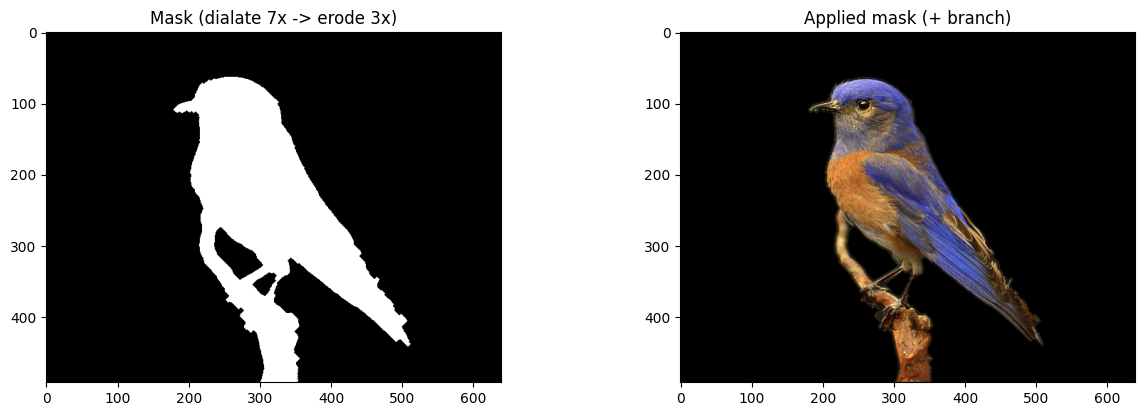

In [35]:
dilate = cv2.dilate(binary_50, kernel_33, iterations=7)
erode = cv2.erode(dilate, kernel_33, iterations=4)

plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.imshow(erode, cmap='gray') 
plt.title("Mask (dialate 7x -> erode 3x)")
plt.subplot(222)
plt.imshow(apply_mask(I_bird_rgb, erode * 255), cmap='gray')  
plt.title("Applied mask (+ branch)")

Text(0.5, 1.0, 'Applied mask (no branch)')

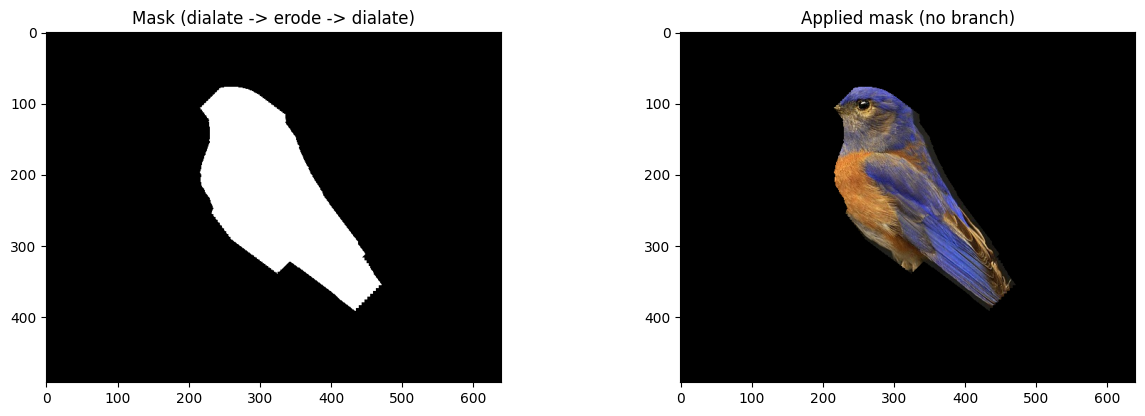

In [36]:
dilate = cv2.dilate(binary_50, kernel_33, iterations=6)
erode = cv2.erode(dilate, kernel_88, iterations=11)
dialate_done = cv2.dilate(erode, kernel_88, iterations=9)

plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.imshow(dialate_done, cmap='gray') 
plt.title("Mask (dialate -> erode -> dialate)")
plt.subplot(222)
plt.imshow(apply_mask(I_bird_rgb, dialate_done * 255))
plt.title("Applied mask (no branch)")

Text(0.5, 1.0, 'Applied mask (no branch)')

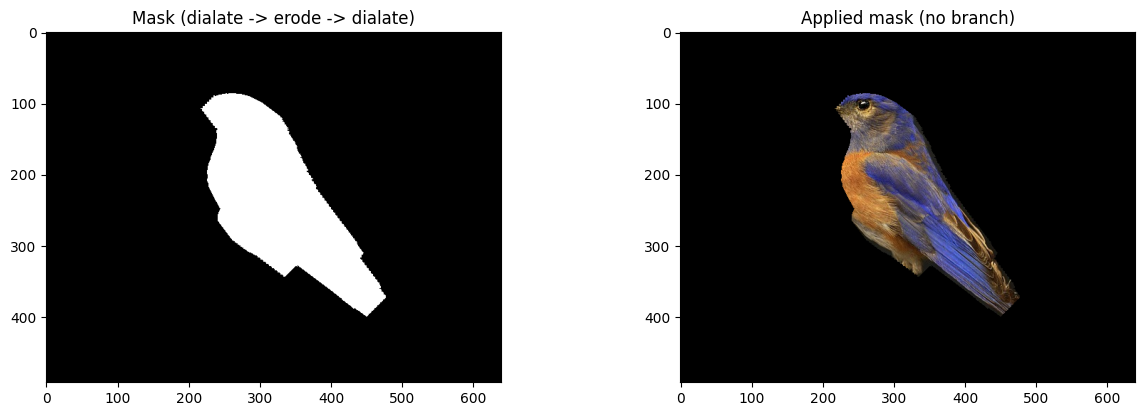

In [37]:
_, binary_90 = cv2.threshold(I_bird_gray, 90, 255, cv2.THRESH_BINARY)

kernel_33 = cv2.getStructuringElement(cv2.MORPH_CROSS, ([3,3]))
kernel_44 = cv2.getStructuringElement(cv2.MORPH_CROSS, ([4,4]))
kernel_55 = cv2.getStructuringElement(cv2.MORPH_CROSS, ([5,5]))
kernel_88 = cv2.getStructuringElement(cv2.MORPH_CROSS, ([8,8]))

dilate = cv2.dilate(binary_90, kernel_44, iterations=10)
erode = cv2.erode(dilate, kernel_88, iterations=12)
dialate_done = cv2.dilate(erode, kernel_88, iterations=6)

plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.imshow(dialate_done, cmap='gray') 
plt.title("Mask (dialate -> erode -> dialate)")
plt.subplot(222)
plt.imshow(apply_mask(I_bird_rgb, dialate_done * 255))
plt.title("Applied mask (no branch)")

## Naloga 6: Delo z živimi slikami


V okviru te naloge si bomo ogledali delo z "živimi" slikami. Za reševanje naloge boste potrebovali spletno kamero. V primeru, da le-te nimate na razpolago, lahko nalogo rešite tudi z uporabo poljubnega video izseka - princip reševanja naloge bo enak.

* Oglejmo si kodo za pridobitev slike iz spletne kamero ter prikaz le-te. Za prekinitev izvajanje funkcijo bom definirali tipko <i>q</i>.

In [38]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)  # 0 = privzeta spletna kamera

# While zanka za posodabljanje pridobljene slike do prekinitve
while(False):
    # Poskusajmo pridobiti trenutno sliko iz spletne kamere
    ret, frame = cap.read()
    
    # Ce to ni mogoce (kamera izkljucena, itd.), koncajmo z izvajanjem funkcije
    if ret == False:
        break
    
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    flipped = cv2.flip(gray_frame, 0)
    # Prikazi trenutno sliko
    cv2.imshow('frame', flipped)
    
    # Ob pritisku tipke 'q' prekini izvajanje funkcije
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Izklopi kamero in zapri okno
cap.release()
cv2.destroyAllWindows()

* Izrišite trenutno sliko spletne kamere poleg katere vizualizirate tudi pripadajočo sivinsko sliko. Izrisani sliki zrcalite z uporabo OpenCV funkcije <i>flip()</i>.

In [39]:
#gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#flipped = cv2.flip(gray_frame, 0)

* (+<b>5 točk</b>) Izberite si predmet poljubne barve in z uporabo znanja iz prejšnjih nalog upragujte sliko s takšnimi vrednostmi, da boste iz nje izluščili izbrani predmet. Z uporabo OpenCV funkcije <i><a href="https://docs.opencv.org/4.2.0/d4/d73/tutorial_py_contours_begin.html" target="_blank">findContours()</a></i> izrišite konturo okoli izluščenih predmetov. Število točk, ki jih boste dobili za to nalogo bo odvisno od robustnosti delovanja vaše metode. 

In [40]:
def detect_objects(frame):
    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    # Create mask using boolean operations
    # Green is typically around 60 in OpenCV HSV (range 0-180)
    # Adjust these values based on your specific green shade
    mask = (hsv[:,:,0] > 95) & (hsv[:,:,0] < 125) & \
            (hsv[:,:,1] > 100) & \
            (hsv[:,:,2] > 50)  # Added value threshold to avoid dark areas

    # Convert boolean mask to uint8 type (required for OpenCV functions)
    mask = mask.astype(np.uint8) * 255
    
    # Optional: Apply morphological operations to remove noise
    kernel = np.ones((5,5), np.uint8)
    mask = cv2.erode(mask, kernel, iterations=1)
    mask = cv2.dilate(mask, kernel, iterations=3)
    
    # Find contours
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Draw contours on original frame
    frame_with_contours = frame.copy()
    cv2.drawContours(frame_with_contours, contours, -1, (0, 255, 0), 2)
    return frame_with_contours, contours, mask  # Added mask to return values for debugging

In [41]:
cap = cv2.VideoCapture(0)  # 0 = privzeta spletna kamera

# While zanka za posodabljanje pridobljene slike do prekinitve
while(True):
    # Poskusajmo pridobiti trenutno sliko iz spletne kamere
    ret, frame = cap.read()
    
    # Ce to ni mogoce (kamera izkljucena, itd.), koncajmo z izvajanjem funkcije
    if ret == False:
        break
    
    # Process frame
    processed_frame, contours, mask = detect_objects(cv2.flip(frame, 1))
    # Prikazi trenutno sliko
    cv2.imshow('Frame', processed_frame)
    cv2.imshow('Mask', mask)

    # Ob pritisku tipke 'q' prekini izvajanje funkcije
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Izklopi kamero in zapri okno
cap.release()
cv2.destroyAllWindows()